In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [74]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
col=[]

for i in range(len(data.columns)):
    col.append(data.columns[i].lower().replace(' ','_'))
data.columns=col
data=data.rename(columns={'employmentstatus':'employment_status'})

In [76]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [77]:
data_num = pd.DataFrame(data.select_dtypes(include=np.number))

In [78]:
data_cat = pd.DataFrame(data.select_dtypes(include=object))

In [79]:
correlations_matrix = data_num.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


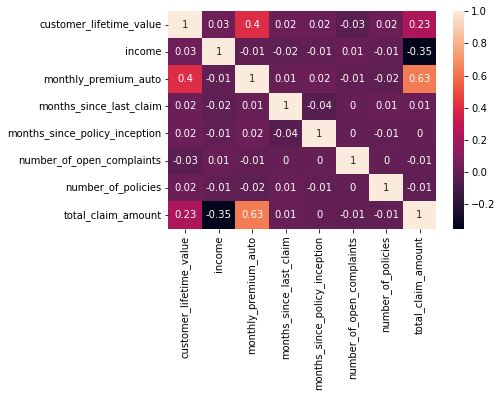

In [80]:
sns.heatmap(round(correlations_matrix, 2), annot=True)
plt.show()

In [97]:
#y, X-split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [98]:
df = data_num.fillna(data_num.mean())
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1691.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:11:20   Log-Likelihood:                -73411.
No. Observations:               10910   AIC:                         1.468e+05
Df Residuals:                   10902   BIC:                         1.469e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            69.6727      8.053      8.651      0.000      53.887      85.459
customer_lifetime_value          -0.0005      0.000     -1.776      0.076      -0.001    5.66e-05
income                           -0.0033   6.39e-05    -52.363      0.000      -0.003      -0.003
monthly_premium_auto              5.3766      0.062     87.391      0.000       5.256       5.497
months_since_last_claim          -0.0272      0.198     -0.137      0.891      -0.416       0.362
months_since_policy_inception    -0.1126      0.069     -1.622      0.105      -0.249       0.023
number_of_open_complaints        -0.8542      2.189     -0.390      0.696      -5.146       3.437
number_of_policies                0.0895      0.808      0.111      0.912      -1.495       1.674
==============================================================================
Omnibus:                     1202.844   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7448.561
Skew:                           0.343   Prob(JB):                         0.00
Kurtosis:                       6.989   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

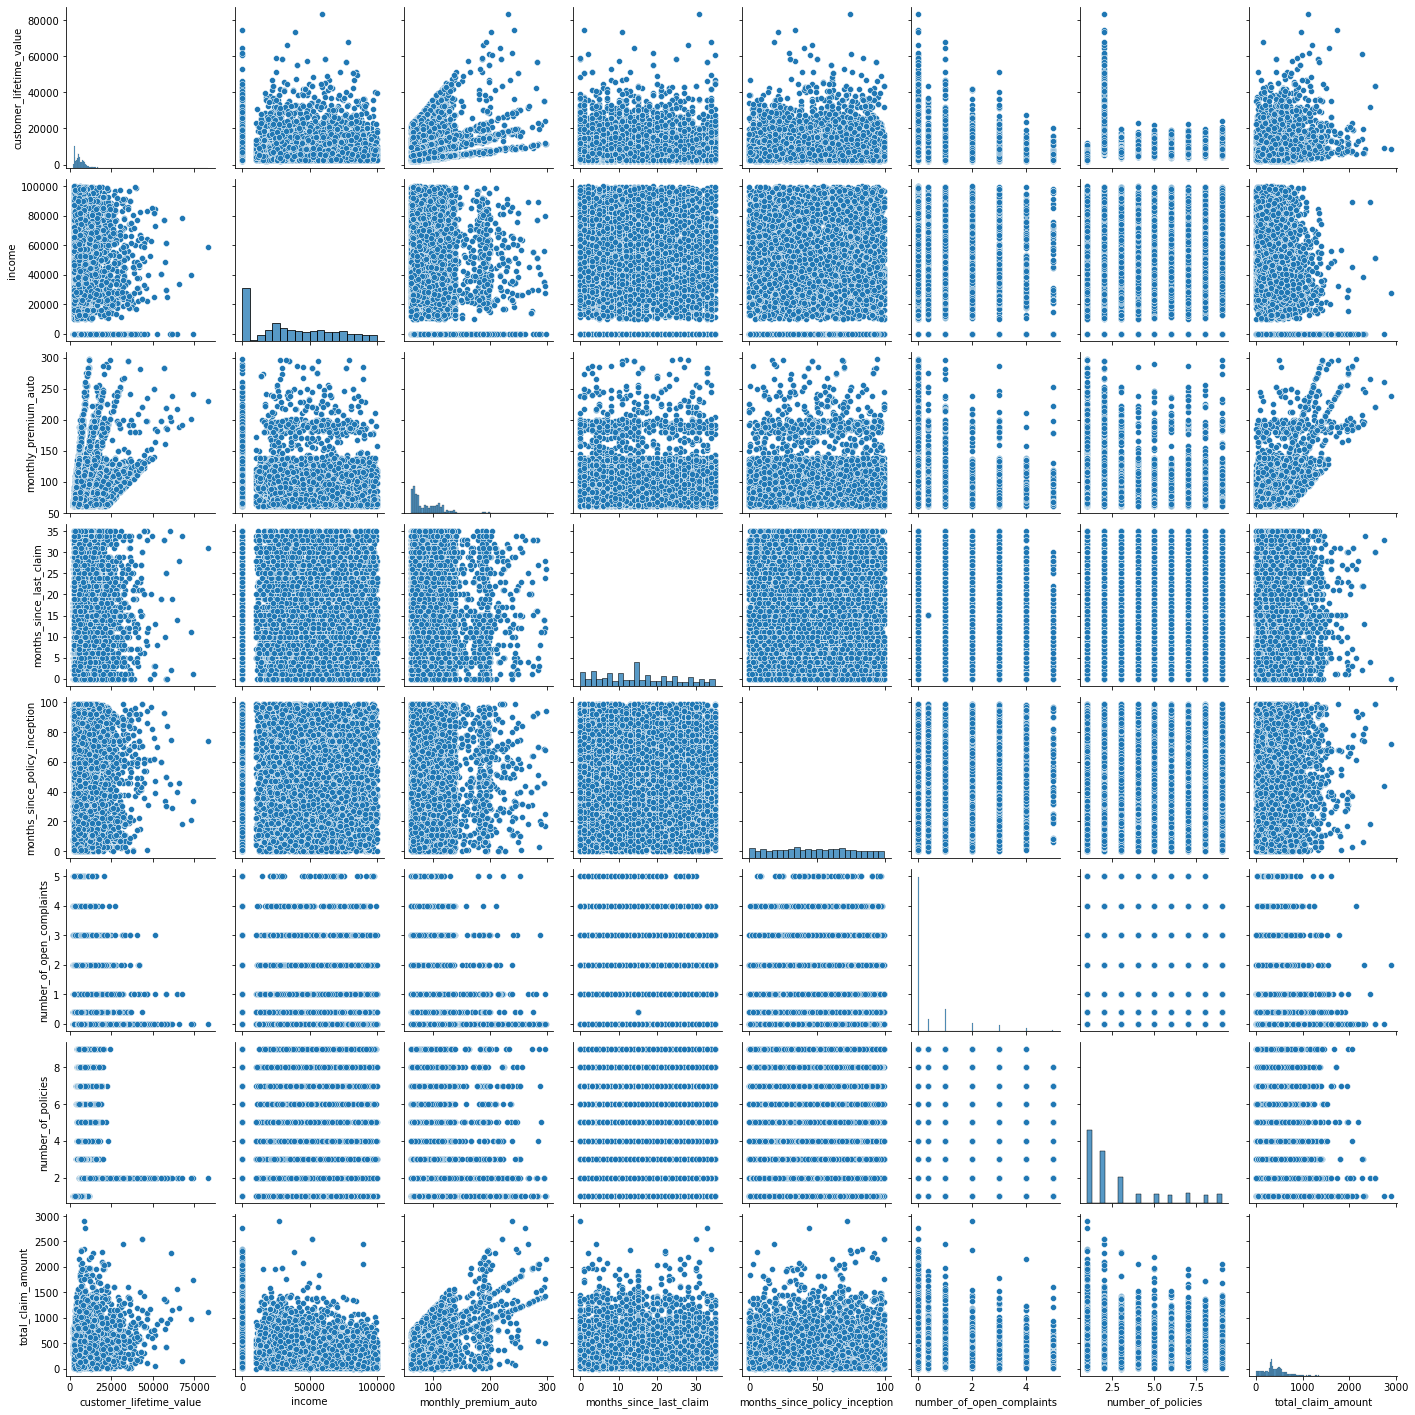

In [103]:
sns.pairplot(df)

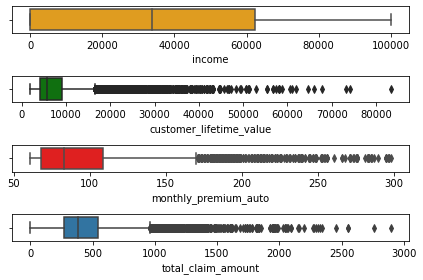

In [102]:
fig, ax = plt.subplots(4,1)

sns.boxplot(x=df['income'], ax = ax[0], color='orange')
sns.boxplot(x=df['customer_lifetime_value'], ax = ax[1], color='green')
sns.boxplot(x=df['monthly_premium_auto'], ax = ax[2], color='red')
sns.boxplot(x=df['total_claim_amount'], ax = ax[3])

fig.tight_layout()
plt.show()

In [118]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df[['income', 'customer_lifetime_value']])
X_normalized = transformer.transform(df[['income', 'customer_lifetime_value']])
print(X_normalized)

[[0.99502422 0.09963329]
 [0.         1.        ]
 [0.82877763 0.55957809]
 ...
 [0.8575774  0.51435494]
 [0.98305087 0.18333302]
 [0.         1.        ]]


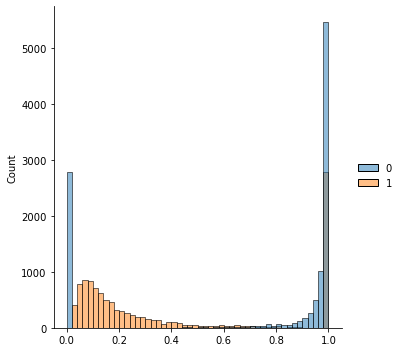

In [119]:
sns.displot(X_normalized,bins= 50)
plt.show()

In [150]:
to_standardize = np.log(df[['monthly_premium_auto','total_claim_amount']])
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(to_standardize)
X_standard = transformer.transform(to_standardize)

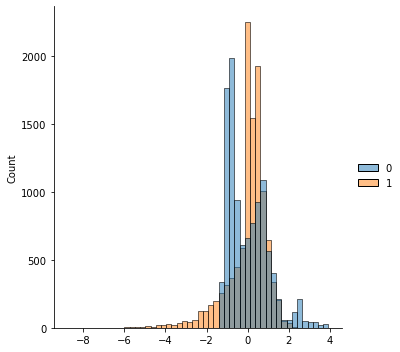

In [151]:
sns.displot(X_standard,bins= 50)
plt.show()